In [1]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

import tensorflow as tf

import gpflow
import gpmaniflow
from gpmaniflow.models.IsoGPLVM import IsoGPLVM

In [2]:
gpflow.config.set_default_float(tf.float32)

import pods
pods.datasets.overide_manual_authorize = True  # dont ask to authorize

data = pods.datasets.oil_100()
Y = np.float32(data['X'])
print('Number of points X Number of dimensions', Y.shape)
data['citation']

Number of points X Number of dimensions (100, 12)


'Bishop, C. M. and G. D. James (1993). Analysis of multiphase flows using dual-energy gamma densitometry and neural networks. Nuclear Instruments and Methods in Physics Research A327, 580-593'

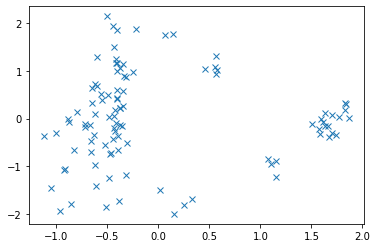

In [3]:
MyIsoGPLVM = IsoGPLVM(data = Y, latent_dim = 2, censoring = 0.5,
                     kernel = gpflow.kernels.SquaredExponential(lengthscales = 0.05))
plt.plot(MyIsoGPLVM.X_data_mean[:,0],MyIsoGPLVM.X_data_mean[:,1], 'x')

In [4]:
from gpflow.utilities import print_summary
print_summary(MyIsoGPLVM)

╒══════════════════════════════╤═══════════╤══════════════════╤═════════╤═════════════╤══════════╤═════════╤════════════════════════════╕
│ name                         │ class     │ transform        │ prior   │ trainable   │ shape    │ dtype   │ value                      │
╞══════════════════════════════╪═══════════╪══════════════════╪═════════╪═════════════╪══════════╪═════════╪════════════════════════════╡
│ IsoGPLVM.X_data_mean         │ Parameter │ Identity         │         │ True        │ (100, 2) │ float32 │ [[-0.5972382, 1.2962812... │
│ IsoGPLVM.data[0]             │           │                  │         │             │          │         │                            │
├──────────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼──────────┼─────────┼────────────────────────────┤
│ IsoGPLVM.kernel.variance     │ Parameter │ Softplus         │         │ True        │ ()       │ float32 │ 1.0                        │
├──────────────────────────────┼──

In [5]:
MyIsoGPLVM.iso_likelihood

In [9]:
training_loss = MyIsoGPLVM.training_loss_closure(compile=True)
optimizer = tf.keras.optimizers.Adam(0.01)
@tf.function
def optimization_step():
    optimizer.minimize(training_loss, MyIsoGPLVM.trainable_variables)
lml_hist = []
for step in range(50):
    optimization_step()
    if step % 1 == 0:
        minibatch_lml = -training_loss().numpy()
        print('Step: %s, LML: %s' % (step, minibatch_lml))
        lml_hist.append(minibatch_lml)

LML = MyIsoGPLVM.log_marginal_likelihood()
LML

Step: 0, LML: -396.00745
Step: 1, LML: -312.72305
Step: 2, LML: -470.9688
Step: 3, LML: 241.56226
Step: 4, LML: 123.53798
Step: 5, LML: 401.10858
Step: 6, LML: 702.24347
Step: 7, LML: 226.82358
Step: 8, LML: 881.2785
Step: 9, LML: 788.01306
Step: 10, LML: 813.92035
Step: 11, LML: 804.5362
Step: 12, LML: 1132.4885
Step: 13, LML: 1237.4631
Step: 14, LML: 1463.56
Step: 15, LML: 1281.5363
Step: 16, LML: 1720.2102
Step: 17, LML: 1670.507
Step: 18, LML: 1531.6824
Step: 19, LML: 2073.1729
Step: 20, LML: 2139.2576
Step: 21, LML: 1999.4639
Step: 22, LML: 2178.05
Step: 23, LML: 1630.1864
Step: 24, LML: 2226.8462
Step: 25, LML: 2302.4915
Step: 26, LML: 1987.4634
Step: 27, LML: 2423.7417
Step: 28, LML: 2116.6973
Step: 29, LML: 1973.1224
Step: 30, LML: 1976.3911
Step: 31, LML: 2732.7417
Step: 32, LML: 2448.9934
Step: 33, LML: 2235.8452
Step: 34, LML: 2498.6484
Step: 35, LML: 2322.2349
Step: 36, LML: 2621.6323
Step: 37, LML: 2489.4604
Step: 38, LML: 2463.2056
Step: 39, LML: 2696.8877
Step: 40, LML: 

<tf.Tensor: shape=(), dtype=float32, numpy=3015.9626>

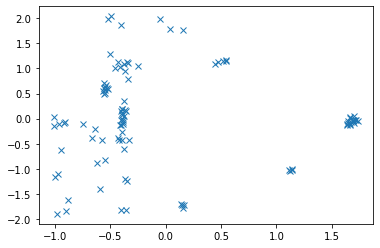

In [10]:
plt.plot(MyIsoGPLVM.X_data_mean[:,0],MyIsoGPLVM.X_data_mean[:,1], 'x')